This project serves two main purposes: first, to visualize the dataset for a clearer understanding of its key insights; and second, to build a regression model to identify the factors that influence mode choice behavior. By following a step-by-step approach, the objectives and methodology will become clearer. Thank you for your time and consideration.

# Data import and visualization

In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install required libraries if not already installed
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/mode choice self approached.csv')
# Display the first few rows of the dataset
df.head()


,WARD NO,AGE,GENDER,MONTHLY INCOME,VEHICLE OWNERSHIP,"IF HAVE, VEHICLE TYPE",NEAREST STOP DISTANCE (m),REGUALR TRAVEL DISTANCE (km),TRAVEL MODE FOR LESS THAN 5KM,REGULAR TRAVEL MODE,WORK,SHOPPING,SOCIAL LIFE
0,3,21,Male,10000,No,NaN,300,1.7,Walking,Bus,Bus,Rickshaw,Bus
1,3,19,Male,0,No,NaN,100,1.2,Walking,Bus,Bus,Rickshaw,Bus
2,3,20,Female,5000,No,NaN,150,3.0,Rickshaw,Laguna,Laguna,Rickshaw,Rickshaw
3,3,30,Male,20000,Yes,Motorcycle,800,3.5,Motorcycle,Motorcycle,Motorcycle,Motorcycle,Motorcycle
4,3,46,Male,35000,Yes,Motorcycle,300,5.0,Motorcycle,Motorcycle,Motorcycle,Motorcycle,Motorcycle


In [ ]:
# Check for missing values
df.isnull().sum()

,0
WARD NO,0
AGE,0
GENDER,0
MONTHLY INCOME,0
VEHICLE OWNERSHIP,0
"IF HAVE, VEHICLE TYPE",279
NEAREST STOP DISTANCE (m),0
REGUALR TRAVEL DISTANCE (km),0
TRAVEL MODE FOR LESS THAN 5KM,0
REGULAR TRAVEL MODE,0


As you can see, there are many null values in my dataset. This is because the dataset was intentionally prepared with certain values originally missing. It's not a case of missing or incomplete data, but rather a reflection of the dataset's intended structure.

In [ ]:
# Display basic statistics for numerical columns
df.describe()


,WARD NO,AGE,MONTHLY INCOME,NEAREST STOP DISTANCE (m),REGUALR TRAVEL DISTANCE (km)
count,514.000000,514.000000,5.140000e+02,514.000000,514.000000
mean,18.929961,29.558366,3.080058e+04,366.498054,4.813307
std,12.007752,9.492045,1.041643e+05,262.103117,4.070776
min,2.000000,12.000000,0.000000e+00,50.000000,0.400000
25%,8.000000,23.000000,1.000000e+04,150.000000,2.400000
50%,20.000000,27.000000,1.800000e+04,300.000000,3.700000
75%,28.000000,35.000000,2.500000e+04,500.000000,6.000000
max,40.000000,64.000000,1.500000e+06,1000.000000,34.000000


The dataset reveals several key insights across different variables. For instance, **Monthly Income** shows a wide range, from 0 to 1,500,000, with most individuals earning between 10,000 and 25,000, but with a few high-income outliers. **Age** is distributed between 12 and 64 years, with a median age of 27, suggesting the dataset mainly includes young to middle-aged individuals. The **Nearest Stop Distance** has a median of 300 meters, indicating that most people live within a reasonable walking distance to transportation stops, although some are as far as 1,000 meters away. **Regular Travel Distance** also varies, with a median of 3.7 kilometers and a maximum of 34 kilometers, showing that while most individuals travel moderate distances, there are some who travel significantly farther. These observations provide a good foundation for understanding the dataset’s overall patterns.

In [ ]:
# Remove leading and trailing spaces from all string columns
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.strip()


In [ ]:
# Get unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f'{column}: {df[column].unique()}')


GENDER: ['Male' 'Female']
VEHICLE OWNERSHIP: ['No' 'Yes']
IF HAVE, VEHICLE TYPE: [nan 'Motorcycle' 'CNG' 'Car' '-' 'Cycle' 'Rickshaw']
TRAVEL MODE FOR LESS THAN 5KM: ['Walking' 'Rickshaw' 'Motorcycle' 'Mahindra' 'Laguna' 'Bus' 'CNG'
 'others']
REGULAR TRAVEL MODE: ['Bus' 'Laguna' 'Motorcycle' 'Mahindra' 'Rickshaw' 'CNG' 'Walking'
 'others' 'Car']
WORK: ['Bus' 'Laguna' 'Motorcycle' 'Mahindra' 'Rickshaw' 'CNG' nan 'Walking'
 'others' 'Car' 'CEG' '-']
SHOPPING: ['Rickshaw' 'Motorcycle' 'CNG' 'Bus' 'Laguna' 'Mahindra' 'Walking'
 'others' 'Motocyle' nan '-']
SOCIAL LIFE: ['Bus' 'Rickshaw' 'Motorcycle' 'CNG' nan 'Motor cycle' 'Walking' 'others'
 'Laguna' '-']


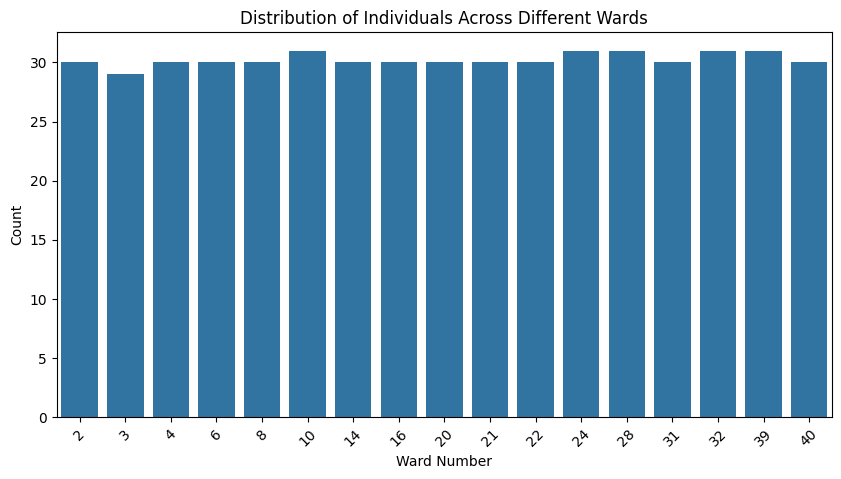

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='WARD NO', data=df)
plt.title('Distribution of Individuals Across Different Wards')
plt.xlabel('Ward Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This graph represents the dataset, showing that opinions were collected from all the wards, with a fairly even distribution across them.

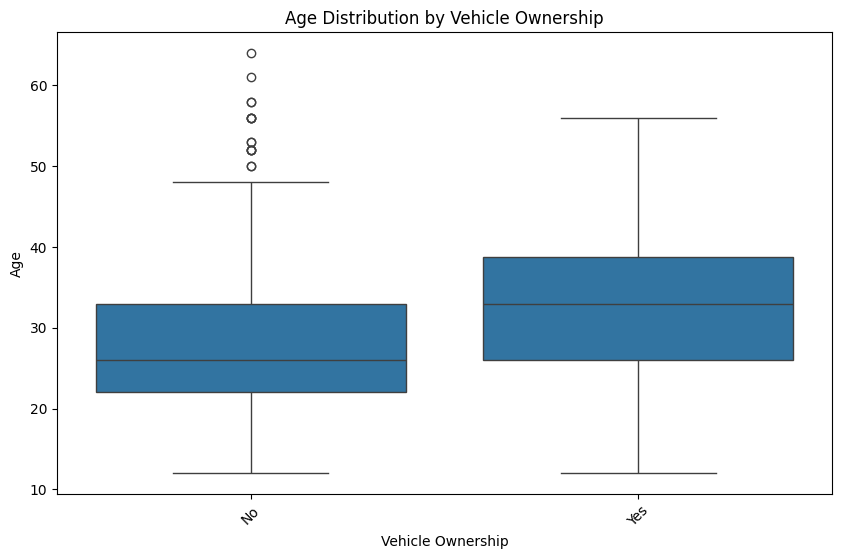

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='VEHICLE OWNERSHIP', y='AGE', data=df)
plt.title('Age Distribution by Vehicle Ownership')
plt.xlabel('Vehicle Ownership')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


There is nothing particularly notable here, as the data shows a slight trend where vehicle ownership increases among older individuals, which is quite a common observation. In summary, individuals with vehicle ownership tend to be slightly older on average compared to those without having vehicle.

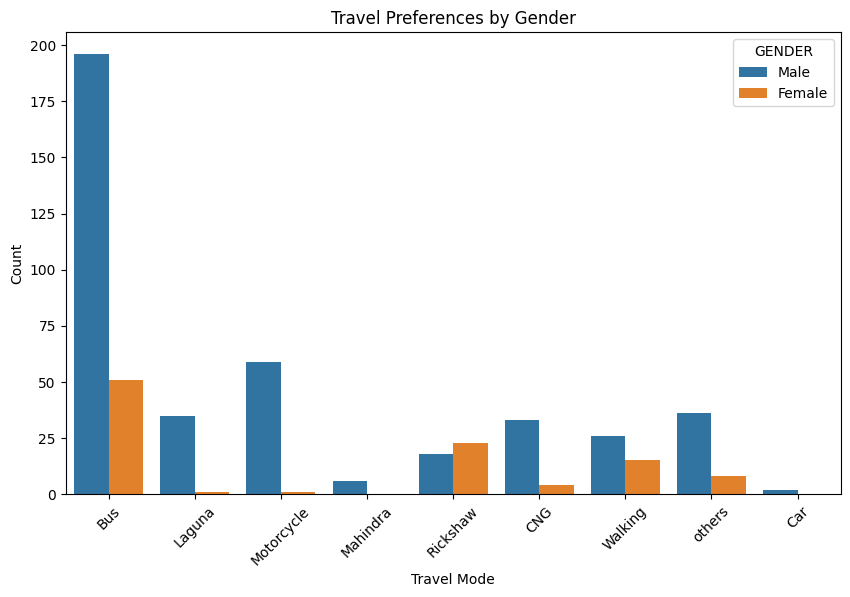

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='REGULAR TRAVEL MODE', hue='GENDER', data=df)
plt.title('Travel Preferences by Gender')
plt.xlabel('Travel Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


From the questionnaire responses, it is clear that the number of males is significantly larger than the number of females. There's nothing particularly surprising here, as it confirms the expected trend: males tend to use transportation more frequently than females.

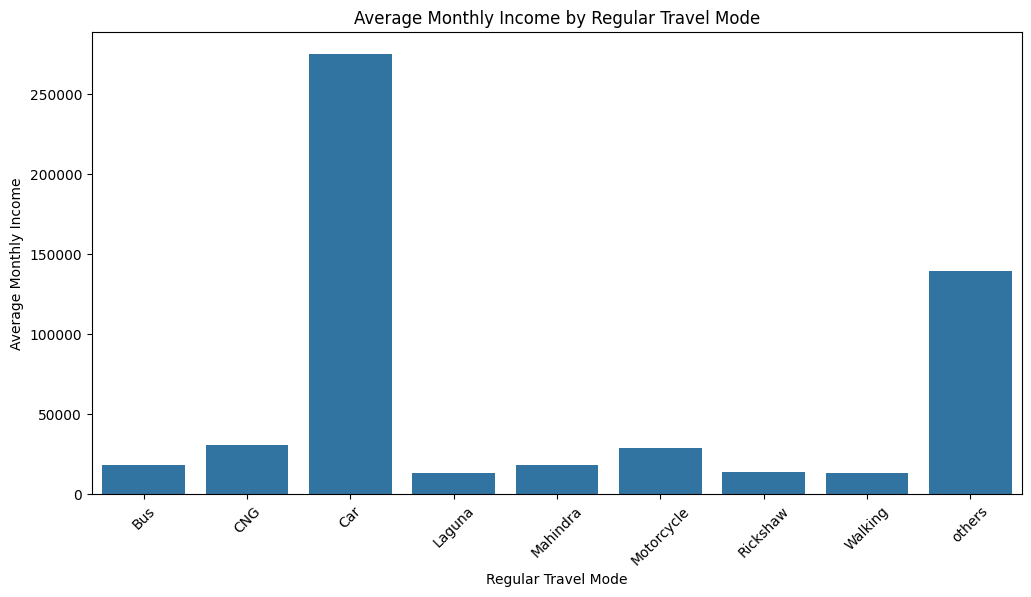

In [ ]:
plt.figure(figsize=(12, 6))
average_income = df.groupby('REGULAR TRAVEL MODE')['MONTHLY INCOME'].mean().reset_index()
sns.barplot(x='REGULAR TRAVEL MODE', y='MONTHLY INCOME', data=average_income)
plt.title('Average Monthly Income by Regular Travel Mode')
plt.xlabel('Regular Travel Mode')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.show()


This bar chart represents the **Average Monthly Income** by **Regular Travel Mode**. Here’s a breakdown of the key insights:

- **Car users** have the highest average monthly income, well above 250,000, indicating that individuals with personal vehicles, particularly cars, tend to have higher incomes.
- For individuals with a **moderate income** (less than 50000), **CNG** (Compressed Natural Gas vehicles) is a common mode of transport, as it is more costly than other public transportation. Those with similar income levels also tend to own **motorcycles**.
- On the other hand, for those without personal vehicles, **public transportation** is the preferred mode of travel. Most of these individuals use **buses** or **Mahindra** (a type of public transport in certain regions).

This visualization highlights how transportation choices correlate with income levels, where higher-income individuals prefer private vehicles, and those with lower incomes rely on public transport.

In [ ]:
# Melt the DataFrame to reshape it for comparison
comparison_df = df.melt(
    id_vars=['WARD NO', 'AGE', 'GENDER', 'MONTHLY INCOME', 'VEHICLE OWNERSHIP', 'NEAREST STOP DISTANCE (m)'],
    value_vars=['REGULAR TRAVEL MODE', 'TRAVEL MODE FOR LESS THAN 5KM', 'SOCIAL LIFE', 'WORK', 'SHOPPING'],
    var_name='Preference Type',
    value_name='Travel Mode'
)


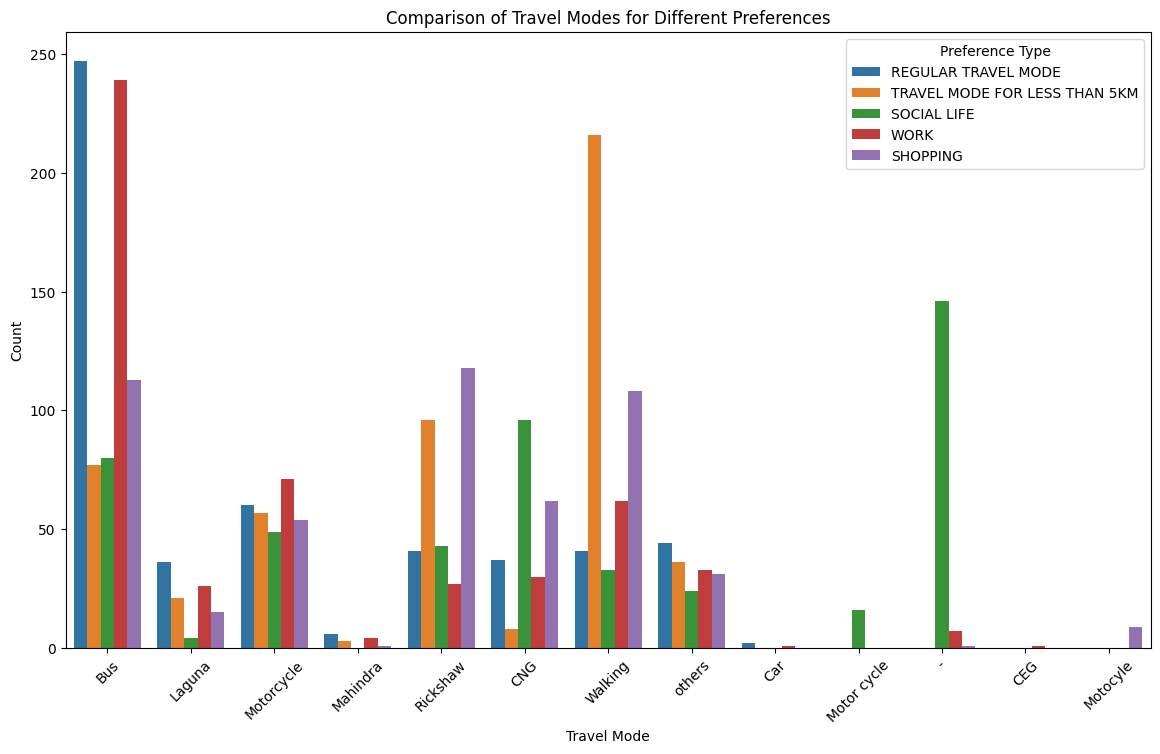

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Travel Mode', hue='Preference Type', data=comparison_df)
plt.title('Comparison of Travel Modes for Different Preferences')
plt.xlabel('Travel Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Preference Type')
plt.show()


This bar chart compares **Travel Modes** based on five different preferences: **Regular Travel Mode**, **Travel Mode for Less Than 5KM**, **Social Life**, **Work**, and **Shopping**. Here's a detailed breakdown:

- For **regular travel mode** and **work**, people predominantly use **buses** and **Laguna** as their main modes of transportation.
- However, for distances less than 5 kilometers and for **social life** or **shopping** purposes, the preferred modes of transport shift. In these cases, people tend to use **Rickshaws**, **CNG**, or prefer **walking**, rather than relying on buses or Laguna.
- Walking shows a significant count for travel under 5 kilometers, which makes sense for shorter distances.
  
This illustration highlights how transportation choices differ based on the purpose of travel, with public transport preferred for longer trips and more personalized modes like walking or rickshaw for shorter or social trips.

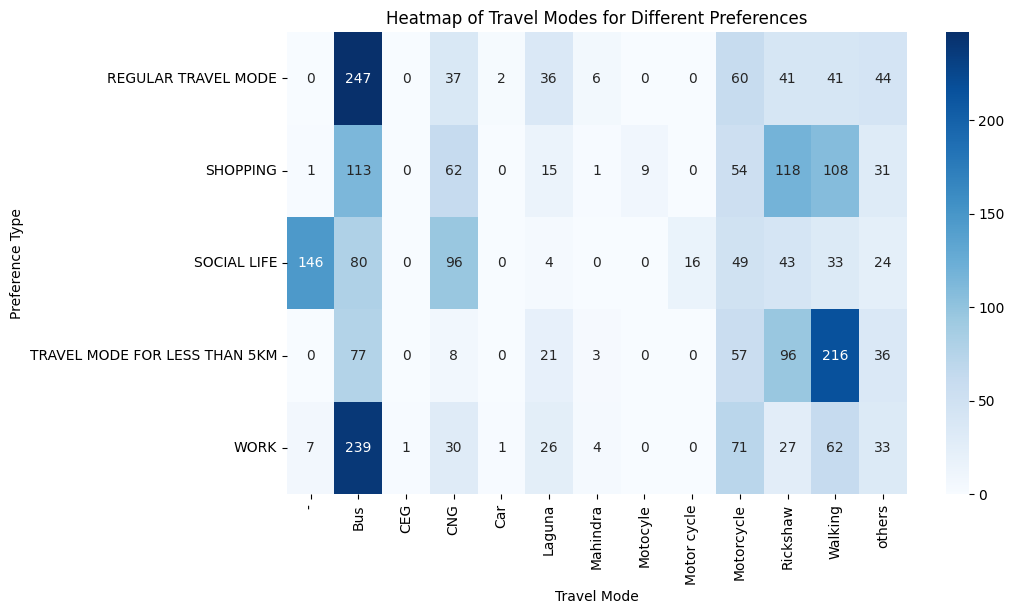

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Travel Modes for Different Preferences')
plt.xlabel('Travel Mode')
plt.ylabel('Preference Type')
plt.show()


This heatmap provides a more detailed view of the **Travel Modes** across different preferences by displaying numerical values for each combination. Here’s how it illustrates the key patterns:

- For distances less than 5 kilometers, people overwhelmingly prefer to **walk** (216 instances), as seen in the dark-shaded cell under **Walking**.
- For **social life** activities, **Rickshaw** is the favored mode of transport, with a high count of 108.
- **Motorcycles** are used across various categories but are especially common for **work** and other purposes.
- **Buses** are a dominant mode for **regular travel** and **work**, with the highest counts seen in these categories (247 and 239, respectively).
- **Shopping** tends to have a more distributed use of modes like **CNG**, **Walking**, and **Rickshaw**, with a noticeable preference for walking (118).

This heatmap is useful for clearly identifying the travel mode preferences based on the type of trip and provides an easy comparison with numerical clarity. It shows similar patterns as previous illustrations but with a more precise view of the data.

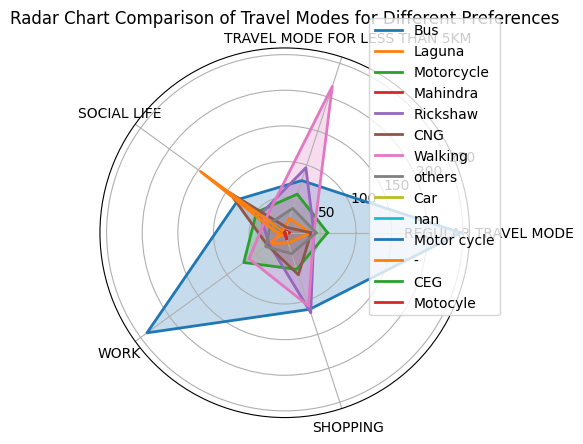

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for radar chart
categories = comparison_df['Preference Type'].unique()
modes = comparison_df['Travel Mode'].unique()

for mode in modes:
    values = [
        comparison_df[(comparison_df['Travel Mode'] == mode) & (comparison_df['Preference Type'] == category)].shape[0]
        for category in categories
    ]
    values += values[:1]  # Close the radar chart

    # Plot radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=mode)
    ax.fill(angles, values, alpha=0.25)

plt.title('Radar Chart Comparison of Travel Modes for Different Preferences')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


This radar chart is a new representation for me as well, to be honest. There is nothing particularly special here, but it does offer a different visual perspective on the relationships we’ve already discussed. It allows you to see the same trends in travel preferences, such as the dominance of walking for short distances and the use of buses for work and regular travel, in a more layered and comparative way.

# Regression Model Analysis

## Data Preprocessing

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
missing_values


,0
WARD NO,0
AGE,0
GENDER,0
MONTHLY INCOME,0
VEHICLE OWNERSHIP,0
"IF HAVE, VEHICLE TYPE",279
NEAREST STOP DISTANCE (m),0
REGUALR TRAVEL DISTANCE (km),0
TRAVEL MODE FOR LESS THAN 5KM,0
REGULAR TRAVEL MODE,0


In [ ]:
# Fill missing values
df['IF HAVE, VEHICLE TYPE'].fillna('No Vehicle', inplace=True)
df['WORK'].fillna('Not Specified', inplace=True)
df['SHOPPING'].fillna('Not Specified', inplace=True)
df['SOCIAL LIFE'].fillna('Not Specified', inplace=True)

# Verify if all missing values have been handled
missing_values_after = df.isnull().sum()

# Display the result to confirm
missing_values_after


<ipython-input-55-f4a7ea17e082>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IF HAVE, VEHICLE TYPE'].fillna('No Vehicle', inplace=True)
<ipython-input-55-f4a7ea17e082>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
WARD NO,0
AGE,0
GENDER,0
MONTHLY INCOME,0
VEHICLE OWNERSHIP,0
"IF HAVE, VEHICLE TYPE",0
NEAREST STOP DISTANCE (m),0
REGUALR TRAVEL DISTANCE (km),0
TRAVEL MODE FOR LESS THAN 5KM,0
REGULAR TRAVEL MODE,0


In [ ]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'GENDER', 'VEHICLE OWNERSHIP', 'IF HAVE, VEHICLE TYPE',
    'TRAVEL MODE FOR LESS THAN 5KM', 'REGULAR TRAVEL MODE',
    'WORK', 'SHOPPING', 'SOCIAL LIFE'
])

# Display the first few rows of the encoded dataset
df_encoded.head()


,WARD NO,AGE,MONTHLY INCOME,NEAREST STOP DISTANCE (m),REGUALR TRAVEL DISTANCE (km),GENDER_Female,GENDER_Male,VEHICLE OWNERSHIP_No,VEHICLE OWNERSHIP_Yes,"IF HAVE, VEHICLE TYPE_-",...,SOCIAL LIFE_-,SOCIAL LIFE_Bus,SOCIAL LIFE_CNG,SOCIAL LIFE_Laguna,SOCIAL LIFE_Motor cycle,SOCIAL LIFE_Motorcycle,SOCIAL LIFE_Not Specified,SOCIAL LIFE_Rickshaw,SOCIAL LIFE_Walking,SOCIAL LIFE_others
0,3,21,10000,300,1.7,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,3,19,0,100,1.2,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,3,20,5000,150,3.0,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,30,20000,800,3.5,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3,46,35000,300,5.0,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In this step, **one-hot encoding** was applied to the categorical columns in the dataset, which is a common preprocessing technique in machine learning. Here's why:

Many machine learning models require numerical inputs, but this dataset contains categorical data (like **Gender**, **Vehicle Ownership**, **Regular Travel Mode**, etc.). One-hot encoding converts these categorical variables into a format that can be provided to machine learning algorithms. For each category, a new column is created, and it is assigned a binary value (0 or 1), indicating the presence or absence of that category for each observation.

For example:
- **Gender_Female** and **Gender_Male** columns were created from the original **Gender** column.
- Similarly, for **Vehicle Ownership**, two columns were generated: **Vehicle Ownership_No** and **Vehicle Ownership_Yes**.

## Model building (Multinomial Logistic Regression)

In [ ]:
# For the model, let's assume the target variable is 'REGULAR TRAVEL MODE'.
# Since this was encoded into multiple one-hot encoded columns, we'll group them back into a single target variable.

# Select target variable (choosing 'REGULAR TRAVEL MODE_Bus' as an example)
target = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Removing one-hot encoded 'REGULAR TRAVEL MODE_' columns from features for now.
features = df_encoded.drop(columns=df_encoded.filter(like='REGULAR TRAVEL MODE').columns)

# Now we can split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build a multinomial logistic regression model using sklearn
from sklearn.linear_model import LogisticRegression

# Initializing the logistic regression model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
logreg_model.fit(X_train, y_train)

# Evaluate the model by checking its accuracy on the test set
accuracy = logreg_model.score(X_test, y_test)

accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.46601941747572817

I initially built a **multinomial logistic regression** model to classify travel modes without applying any **feature scaling**. While this gave me a baseline accuracy, I noticed that the model may be sensitive to the different **ranges** of numerical variables, such as age, income, and travel distances. To address this, I applied **feature scaling** using **StandardScaler**, which standardizes numerical features to have a mean of 0 and a standard deviation of 1. This step is crucial because **logistic regression**, especially with solvers like 'lbfgs', can be influenced by the **magnitude of feature values**, causing slower convergence or suboptimal performance. By scaling the features, I ensured that all variables are treated equally, improving the model's ability to find **optimal coefficients** more efficiently. After scaling, I re-trained the model and observed its performance, comparing the accuracy **before and after scaling** to assess its impact.

In [ ]:
# Let's apply feature scaling to the numerical variables for better model performance
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns
numerical_columns = ['AGE', 'MONTHLY INCOME', 'NEAREST STOP DISTANCE (m)', 'REGUALR TRAVEL DISTANCE (km)']

# Applying StandardScaler to the numerical columns
scaler = StandardScaler()

# Scaling the training and test data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Re-train the logistic regression model after scaling
logreg_model.fit(X_train, y_train)

# Re-evaluate the model's accuracy after scaling
scaled_accuracy = logreg_model.score(X_test, y_test)

scaled_accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8640776699029126

Now, i gained 87% accuracy after applying the above mentioned feature scaling process

In [ ]:
# Select only the columns that match the user's key factors
key_factors = ['AGE', 'MONTHLY INCOME', 'VEHICLE OWNERSHIP_No', 'VEHICLE OWNERSHIP_Yes',
               'REGUALR TRAVEL DISTANCE (km)', 'WARD NO', 'GENDER_Female', 'GENDER_Male',
               'NEAREST STOP DISTANCE (m)']

# Re-train the model using only these factors
X_train_key = X_train[key_factors]
X_test_key = X_test[key_factors]

# Re-train logistic regression model with the selected factors
logreg_model_key = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg_model_key.fit(X_train_key, y_train)

# Extract coefficients for the key factors
coefficients_key = logreg_model_key.coef_[0]

# Create a new dataframe for key factor importance
importance_df_key = pd.DataFrame({
    'Feature': key_factors,
    'Coefficient': coefficients_key
})

# Sort by absolute value of coefficients
importance_df_key['Absolute Coefficient'] = np.abs(importance_df_key['Coefficient'])
importance_df_key_sorted = importance_df_key.sort_values(by='Absolute Coefficient', ascending=False)


# Show top influential key factors
importance_df_key_sorted.head(10)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient,Absolute Coefficient
4,REGUALR TRAVEL DISTANCE (km),1.066289,1.066289
3,VEHICLE OWNERSHIP_Yes,-0.926855,0.926855
2,VEHICLE OWNERSHIP_No,0.870540,0.870540
8,NEAREST STOP DISTANCE (m),0.447435,0.447435
1,MONTHLY INCOME,-0.296848,0.296848
7,GENDER_Male,-0.253358,0.253358
6,GENDER_Female,0.197042,0.197042
0,AGE,-0.078718,0.078718
5,WARD NO,0.036398,0.036398


The coefficients show the strength and direction of the relationship between each feature and the target variable (e.g., different travel modes). Features with larger absolute coefficients have more influence on the model's predictions, while smaller values suggest less influence. For instance, "REGULAR TRAVEL DISTANCE (km)" has the largest positive coefficient, indicating it's a strong predictor, whereas "WARD NO" has a very small coefficient, indicating it's less influential.

This table helps you interpret how each feature impacts the decision-making process of the logistic regression model.

### 1) REGULAR TRAVEL MODE

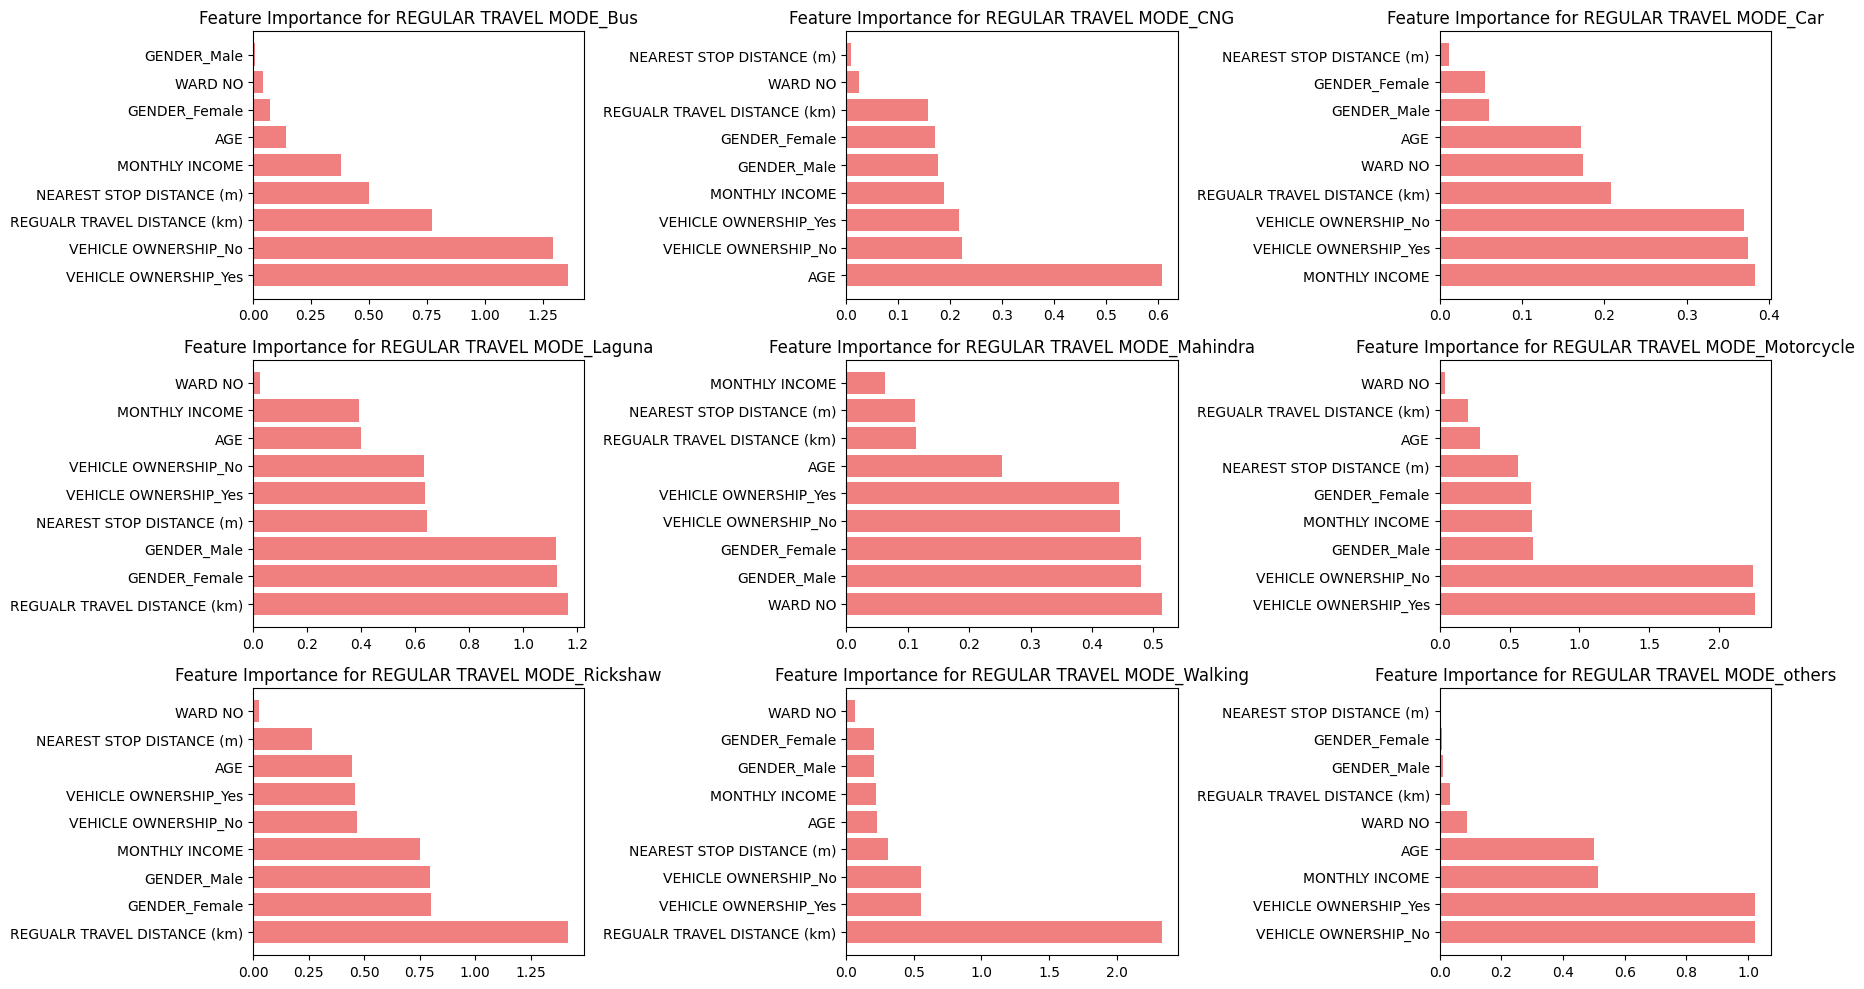

In [ ]:
# Let's first extract all the unique travel modes from the 'REGULAR TRAVEL MODE' columns
regular_travel_modes = df_encoded.filter(like='REGULAR TRAVEL MODE').columns

# Prepare to store the results for each mode
mode_importance_dfs = {}

# Loop through each regular travel mode and build a model, focusing on the user's key factors
for mode in regular_travel_modes:
    # Define the target variable for this specific mode (binary classification: this mode vs others)
    target_mode = df_encoded[mode]

    # Re-train logistic regression model with the selected factors for each mode
    logreg_model_mode = LogisticRegression(max_iter=500)
    logreg_model_mode.fit(X_train_key, target_mode.iloc[X_train.index])

    # Extract coefficients for the key factors for this mode
    coefficients_mode = logreg_model_mode.coef_[0]

    # Create a new dataframe for key factor importance for this mode
    importance_df_mode = pd.DataFrame({
        'Feature': key_factors,
        'Coefficient': coefficients_mode
    })

    # Sort by absolute value of coefficients
    importance_df_mode['Absolute Coefficient'] = np.abs(importance_df_mode['Coefficient'])
    importance_df_mode_sorted = importance_df_mode.sort_values(by='Absolute Coefficient', ascending=False)

    # Store the sorted dataframe for each mode
    mode_importance_dfs[mode] = importance_df_mode_sorted

# Now let's visualize the top factors for each regular travel mode.
plt.figure(figsize=(18, 10))

for i, mode in enumerate(regular_travel_modes, 1):
    plt.subplot(3, 3, i)
    plt.barh(mode_importance_dfs[mode]['Feature'], mode_importance_dfs[mode]['Absolute Coefficient'], color='lightcoral')
    plt.title(f'Feature Importance for {mode}')
    plt.tight_layout()

# Show the visualizations
plt.show()


The graphs display the **feature importance** for different **regular travel modes** (Bus, CNG, Car, Laguna, Mahindra, Motorcycle, Rickshaw, Walking, and Others), showing how each feature influences the likelihood of choosing a particular mode of transportation.

Across all modes, **vehicle ownership** (both "Yes" and "No") and **regular travel distance** are consistently among the most significant factors. For example, in the Bus travel modes, **regular travel distance** and **vehicle ownership** (No) have the highest impact, indicating that people who don't own vehicles or travel longer distances are more likely to choose these modes. For **Mahindra**, I noticed **Ward No** is the most important feature, which indicates this public transport covers every ward, and may has maintained a minimum stop distance from home.

In contrast, **monthly income** plays a more moderate role in modes like Car, Mahindra, and Motorcycle, suggesting that higher-income individuals are more likely to prefer private or motorized travel. Meanwhile, **age** and **nearest stop distance** are also influential in modes like CNG and Walking but are less critical for Car and Motorcycle modes.


### 2) TRAVEL MODE FOR LESS THAN 5KM

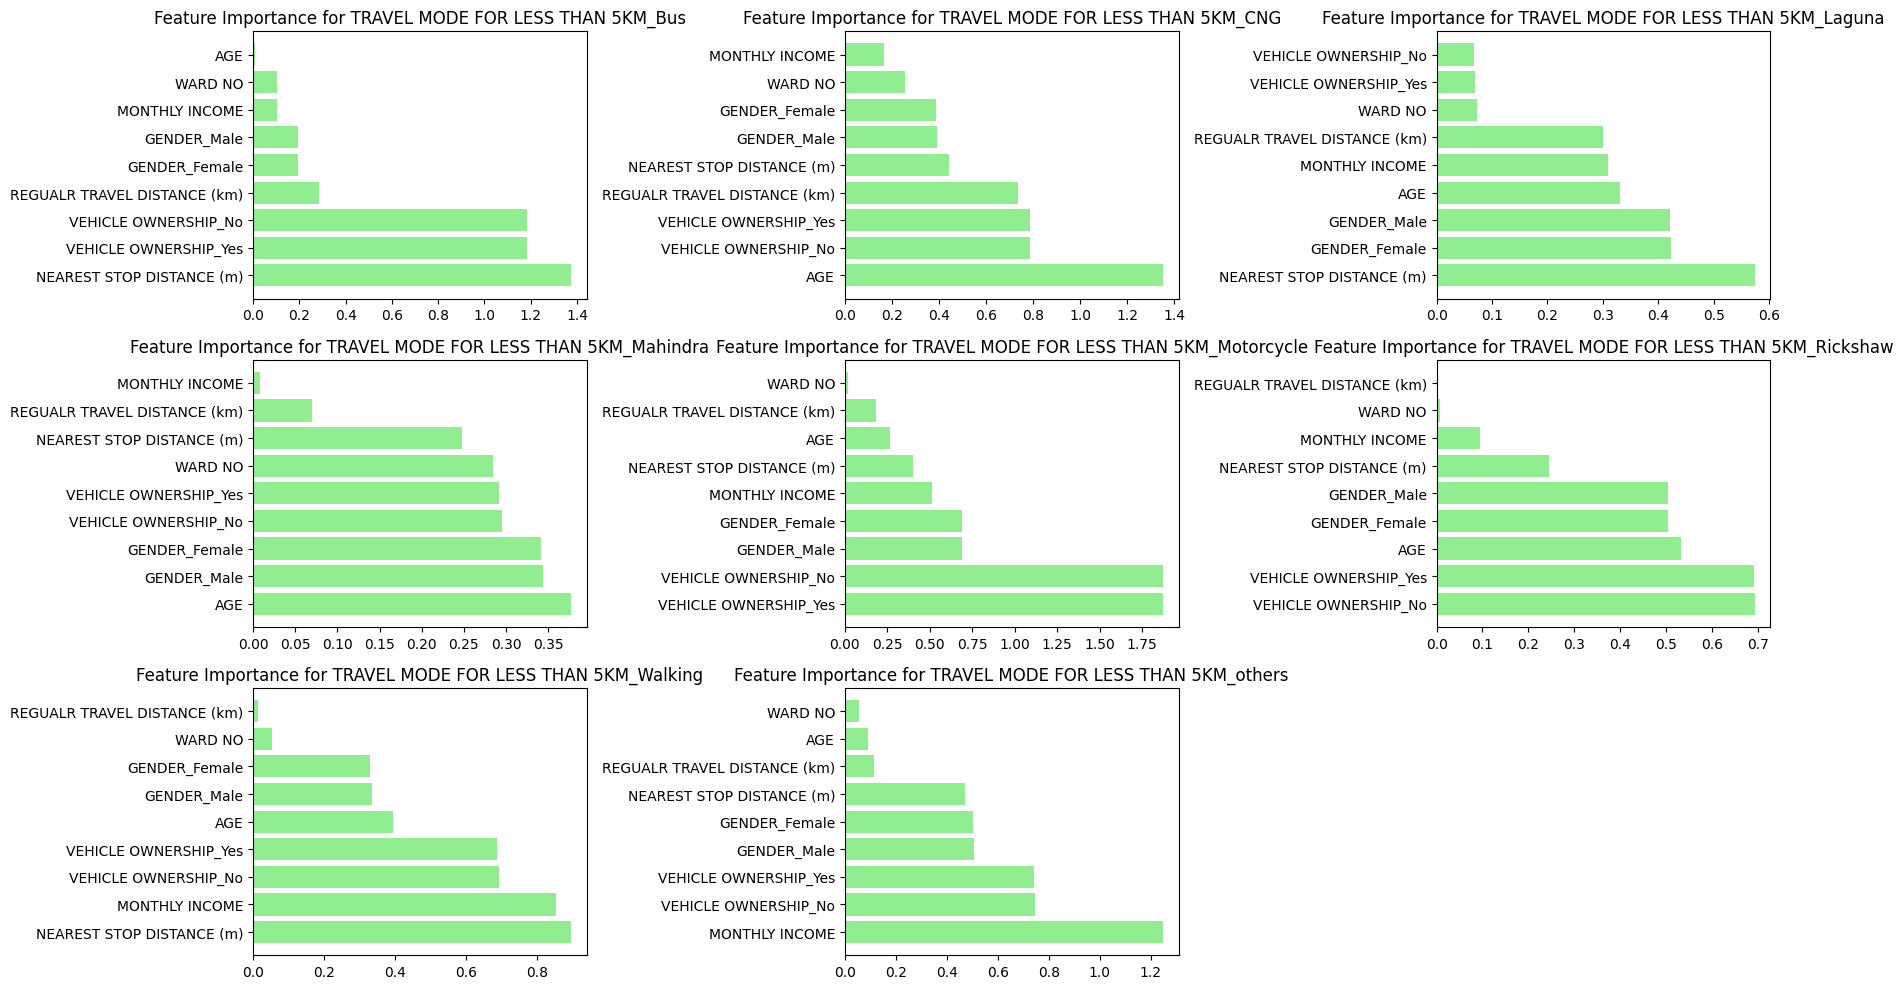

In [ ]:
# Focus on the 'TRAVEL MODE FOR LESS THAN 5KM' columns only
travel_less_5km_columns = df_encoded.filter(like='TRAVEL MODE FOR LESS THAN 5KM').columns

# Prepare to store the results for each travel mode
importance_dfs_travel_5km = {}

# Loop through each travel mode for less than 5km and build a model
for col in travel_less_5km_columns:
    # Define the target variable for this specific travel mode (binary classification: this mode vs others)
    target_col = df_encoded[col]

    # Re-train logistic regression model with the selected key factors
    logreg_model_col = LogisticRegression(max_iter=500)
    logreg_model_col.fit(X_train_key, target_col.iloc[X_train.index])

    # Extract coefficients for the key factors for this travel mode
    coefficients_col = logreg_model_col.coef_[0]

    # Create a new dataframe for key factor importance for this travel mode
    importance_df_col = pd.DataFrame({
        'Feature': key_factors,
        'Coefficient': coefficients_col
    })

    # Sort by absolute value of coefficients
    importance_df_col['Absolute Coefficient'] = np.abs(importance_df_col['Coefficient'])
    importance_df_col_sorted = importance_df_col.sort_values(by='Absolute Coefficient', ascending=False)

    # Store the sorted dataframe for each travel mode
    importance_dfs_travel_5km[col] = importance_df_col_sorted

# Now let's visualize the top factors for each travel mode for trips less than 5km.
plt.figure(figsize=(18, 10))

# Set a grid size based on the number of travel modes for less than 5km
num_columns = len(travel_less_5km_columns)
rows = (num_columns // 3) + 1  # Adjust grid rows

for i, col in enumerate(travel_less_5km_columns, 1):
    plt.subplot(rows, 3, i)
    plt.barh(importance_dfs_travel_5km[col]['Feature'], importance_dfs_travel_5km[col]['Absolute Coefficient'], color='lightgreen')
    plt.title(f'Feature Importance for {col}')
    plt.tight_layout()

# Show the updated visualizations
plt.show()


These graphs represent the feature importance for different travel modes for distances less than 5 km.

- **Walking** displays an interesting balance where **Vehicle Ownership (Yes)** still plays a role. This indicates that even individuals who own vehicles prefer walking for short trips.
- **Laguna** presents a unique combination where **Nearest Stop Distance**, **Income**, and **Vehicle Ownership (No)** are all important, suggesting that it caters to a specific demographic looking for a mix of affordability and ease of access for short trips.
- **Mahindra** is one of the few modes where **Monthly Income** plays a moderate role, suggesting it may be a preferred option for those in a middle-income range who prioritize both affordability and convenience for trips under 5 km.

### 3) Work

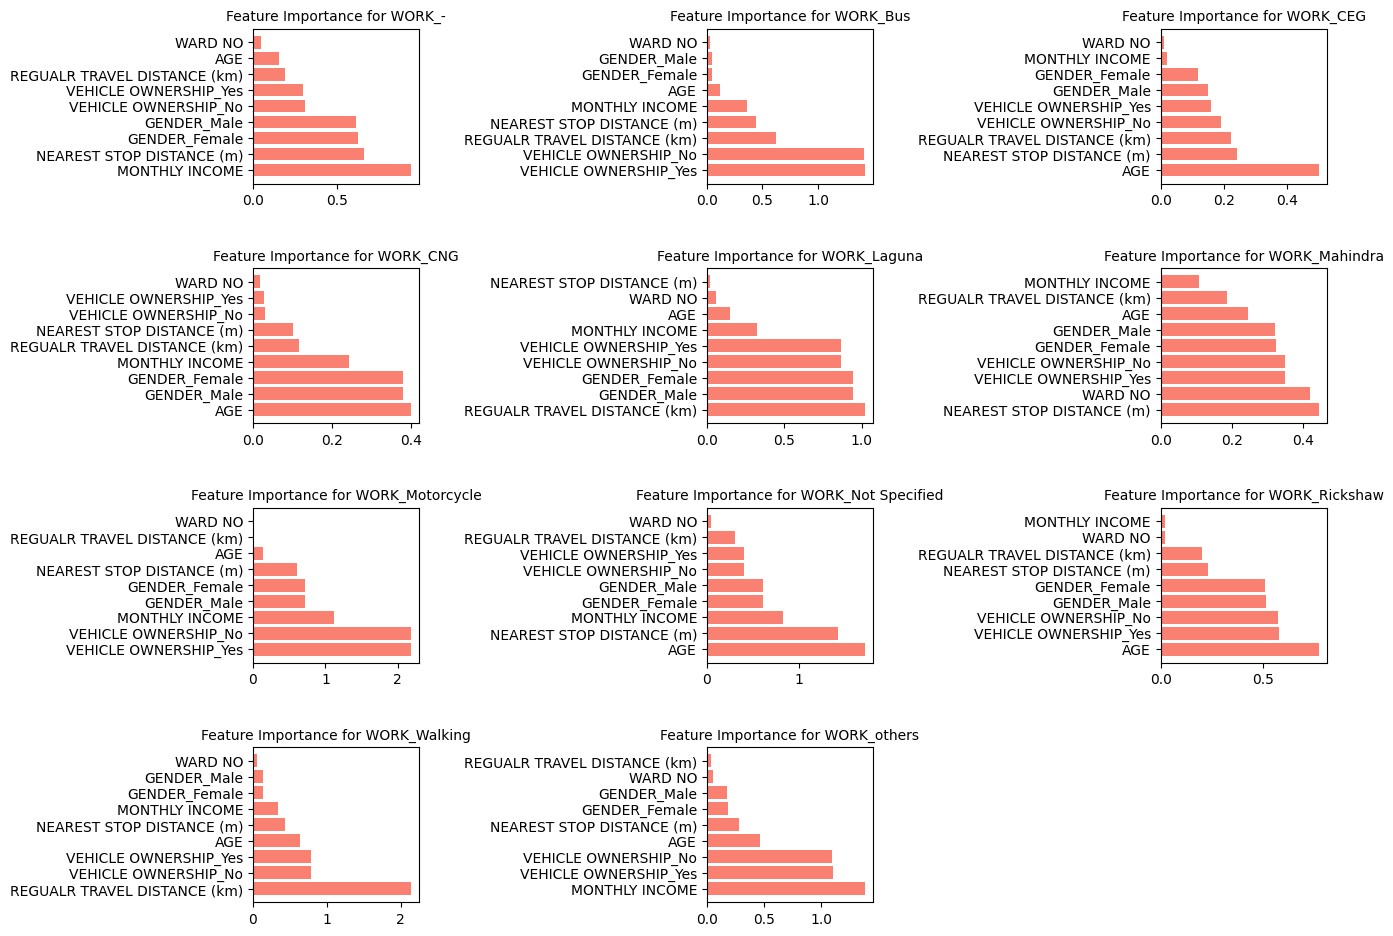

In [ ]:
# Focus on the 'WORK' columns
work_columns = df_encoded.filter(like='WORK').columns

# Identify work columns with more than one unique value in the training set
valid_work_columns = [col for col in work_columns if len(df_encoded[col].iloc[X_train.index].unique()) > 1]

# Prepare to store the results for each valid work-related mode
importance_dfs_valid_work = {}

# Loop through each valid work mode and build a model
for col in valid_work_columns:
    # Define the target variable for this specific work mode (binary classification: this mode vs others)
    target_col = df_encoded[col]

    # Re-train logistic regression model with the selected key factors
    logreg_model_col = LogisticRegression(max_iter=500)
    logreg_model_col.fit(X_train_key, target_col.iloc[X_train.index])

    # Extract coefficients for the key factors for this work mode
    coefficients_col = logreg_model_col.coef_[0]

    # Create a new dataframe for key factor importance for this work mode
    importance_df_col = pd.DataFrame({
        'Feature': key_factors,
        'Coefficient': coefficients_col
    })

    # Sort by absolute value of coefficients
    importance_df_col['Absolute Coefficient'] = np.abs(importance_df_col['Coefficient'])
    importance_df_col_sorted = importance_df_col.sort_values(by='Absolute Coefficient', ascending=False)

    # Store the sorted dataframe for each valid work mode
    importance_dfs_valid_work[col] = importance_df_col_sorted

# Now let's visualize the top factors for each valid work mode.
plt.figure(figsize=(14, 10))

# Set a grid size based on the number of valid work modes
num_columns = len(valid_work_columns)
rows = (num_columns // 3) + 1  # Adjust grid rows

for i, col in enumerate(valid_work_columns, 1):
    plt.subplot(rows, 3, i)
    plt.barh(importance_dfs_valid_work[col]['Feature'], importance_dfs_valid_work[col]['Absolute Coefficient'], color='salmon')
    plt.title(f'Feature Importance for {col}', fontsize=10)
    plt.tight_layout(pad=3.0)  # Add more padding between plots for better clarity

# Show the updated visualizations for valid work modes
plt.show()


The graphs highlight the key factors influencing people's choice of transportation modes for work. Features such as **vehicle ownership**, **distance to the nearest stop**, and **regular travel distance** are some of the most important. For example, **vehicle ownership** significantly impacts whether someone uses a motorcycle or a bus, while **monthly income** and **travel distance** affect choices for CNGs and Rickshaws. Overall, **nearest distance to stops** and whether someone owns a vehicle are consistently strong influencers across different transport modes used for commuting to work.

### 4) Shopping

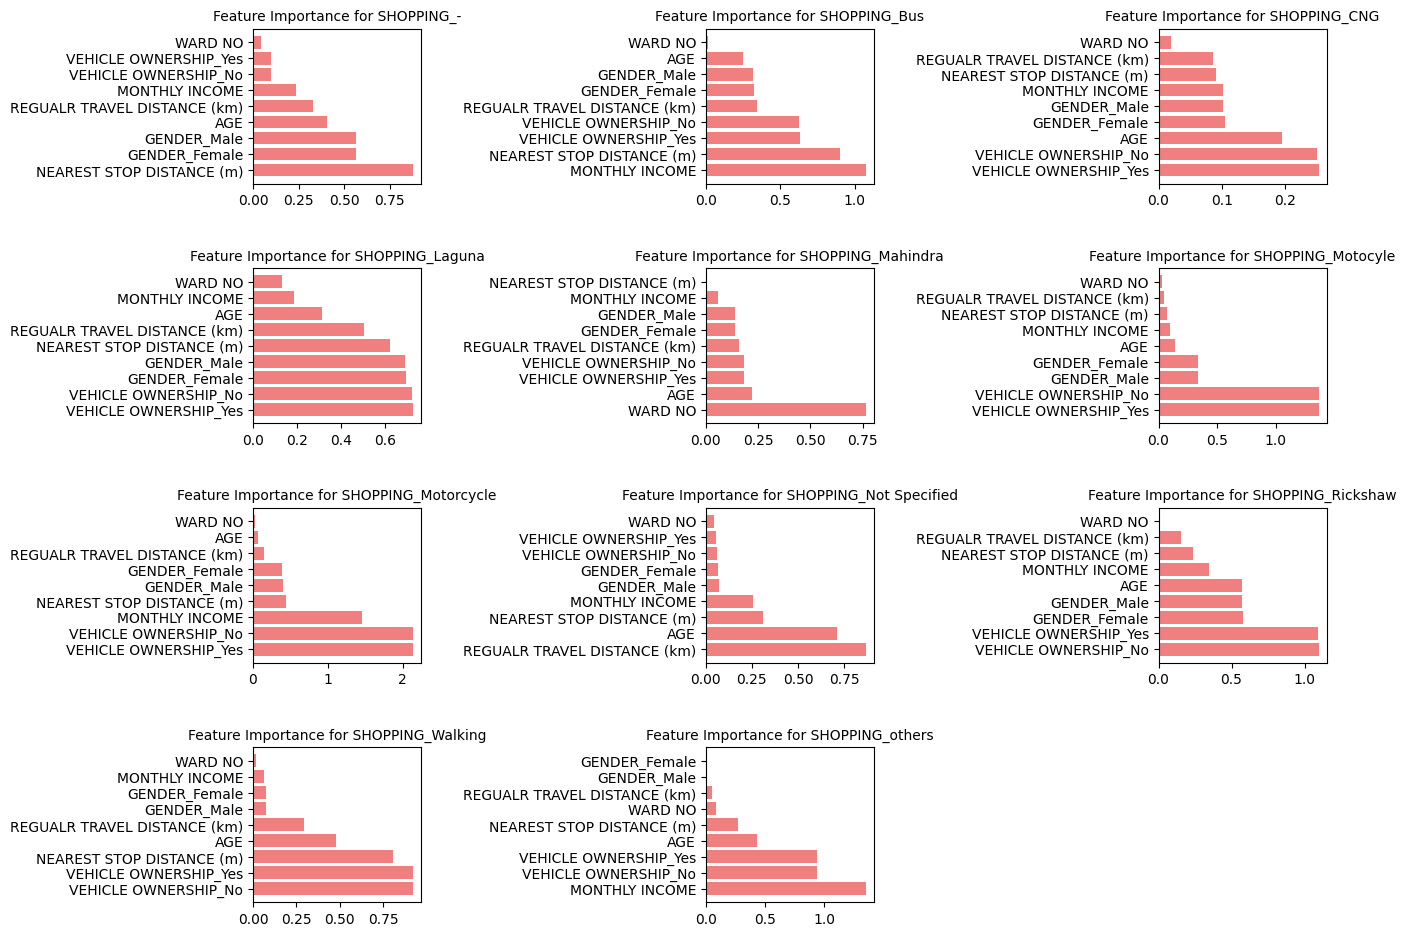

In [ ]:
# Focus on the 'SHOPPING' columns
shopping_columns = df_encoded.filter(like='SHOPPING').columns

# Identify shopping columns with more than one unique value in the training set
valid_shopping_columns = [col for col in shopping_columns if len(df_encoded[col].iloc[X_train.index].unique()) > 1]

# Prepare to store the results for each valid shopping-related mode
importance_dfs_valid_shopping = {}

# Loop through each valid shopping mode and build a model
for col in valid_shopping_columns:
    # Define the target variable for this specific shopping mode (binary classification: this mode vs others)
    target_col = df_encoded[col]

    # Re-train logistic regression model with the selected key factors
    logreg_model_col = LogisticRegression(max_iter=500)
    logreg_model_col.fit(X_train_key, target_col.iloc[X_train.index])

    # Extract coefficients for the key factors for this shopping mode
    coefficients_col = logreg_model_col.coef_[0]

    # Create a new dataframe for key factor importance for this shopping mode
    importance_df_col = pd.DataFrame({
        'Feature': key_factors,
        'Coefficient': coefficients_col
    })

    # Sort by absolute value of coefficients
    importance_df_col['Absolute Coefficient'] = np.abs(importance_df_col['Coefficient'])
    importance_df_col_sorted = importance_df_col.sort_values(by='Absolute Coefficient', ascending=False)

    # Store the sorted dataframe for each valid shopping mode
    importance_dfs_valid_shopping[col] = importance_df_col_sorted

# Now let's visualize the top factors for each valid shopping mode.
plt.figure(figsize=(14, 10))

# Set a grid size based on the number of valid shopping modes
num_columns = len(valid_shopping_columns)
rows = (num_columns // 3) + 1  # Adjust grid rows

for i, col in enumerate(valid_shopping_columns, 1):
    plt.subplot(rows, 3, i)
    plt.barh(importance_dfs_valid_shopping[col]['Feature'], importance_dfs_valid_shopping[col]['Absolute Coefficient'], color='lightcoral')
    plt.title(f'Feature Importance for {col}', fontsize=10)
    plt.tight_layout(pad=3.0)  # Add more padding between plots for better clarity

# Show the updated visualizations for valid shopping modes
plt.show()


While the common variables like **vehicle ownership** and **stop distance** dominate in influencing transportation choices for shopping, some rare points reveal unique insights. For instance, **rickshaws serve as a medium-range transport for non-vehicle owners**, **females tend to favor public and hired transport**, and **Laguna users** seem to prioritize multiple factors like income and distance, making them an interesting segment. Additionally, **ward number** matters more for public transport modes, indicating the significant role of geographic infrastructure in transportation choices.


### 5) Social Life

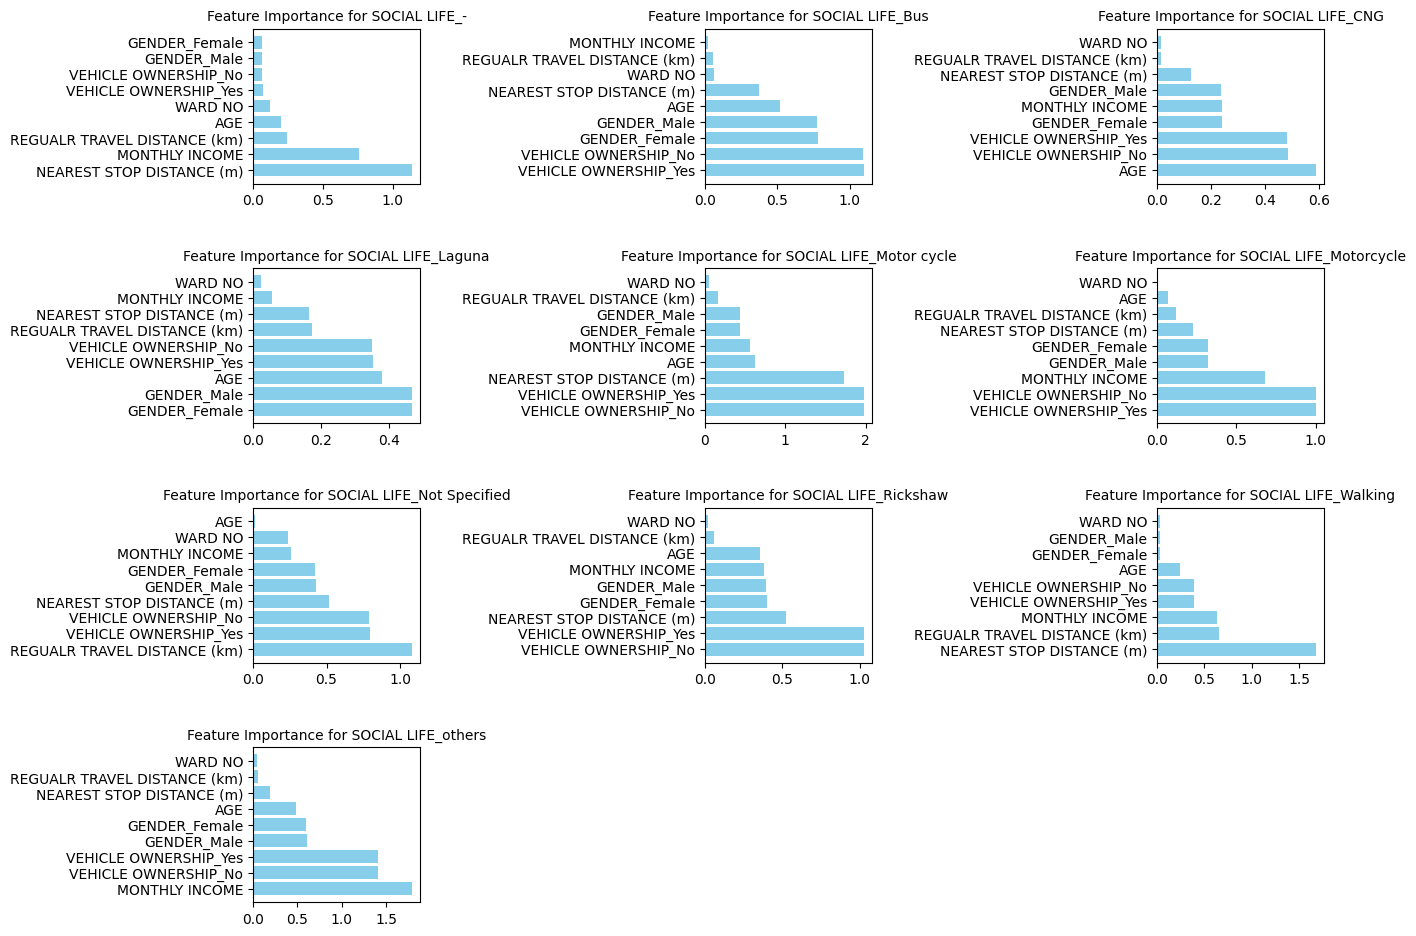

In [ ]:
# Focus on the 'SOCIAL LIFE' columns
social_life_columns = df_encoded.filter(like='SOCIAL LIFE').columns

# Identify social life columns with more than one unique value in the training set
valid_social_life_columns = [col for col in social_life_columns if len(df_encoded[col].iloc[X_train.index].unique()) > 1]

# Prepare to store the results for each valid social life-related mode
importance_dfs_valid_social_life = {}

# Loop through each valid social life mode and build a model
for col in valid_social_life_columns:
    # Define the target variable for this specific social life mode (binary classification: this mode vs others)
    target_col = df_encoded[col]

    # Re-train logistic regression model with the selected key factors
    logreg_model_col = LogisticRegression(max_iter=500)
    logreg_model_col.fit(X_train_key, target_col.iloc[X_train.index])

    # Extract coefficients for the key factors for this social life mode
    coefficients_col = logreg_model_col.coef_[0]

    # Create a new dataframe for key factor importance for this social life mode
    importance_df_col = pd.DataFrame({
        'Feature': key_factors,
        'Coefficient': coefficients_col
    })

    # Sort by absolute value of coefficients
    importance_df_col['Absolute Coefficient'] = np.abs(importance_df_col['Coefficient'])
    importance_df_col_sorted = importance_df_col.sort_values(by='Absolute Coefficient', ascending=False)

    # Store the sorted dataframe for each valid social life mode
    importance_dfs_valid_social_life[col] = importance_df_col_sorted

# Now let's visualize the top factors for each valid social life mode.
plt.figure(figsize=(14, 10))

# Set a grid size based on the number of valid social life modes
num_columns = len(valid_social_life_columns)
rows = (num_columns // 3) + 1  # Adjust grid rows

for i, col in enumerate(valid_social_life_columns, 1):
    plt.subplot(rows, 3, i)
    plt.barh(importance_dfs_valid_social_life[col]['Feature'], importance_dfs_valid_social_life[col]['Absolute Coefficient'], color='skyblue')
    plt.title(f'Feature Importance for {col}', fontsize=10)
    plt.tight_layout(pad=3.0)  # Add more padding between plots for better clarity

# Show the updated visualizations for valid social life modes
plt.show()


For social life, **Laguna** stands out as one of the more balanced graphs, where multiple factors like **Vehicle Ownership**, **Nearest Stop Distance**, and **Income** all have moderate importance. This suggests **Laguna** is a versatile option, chosen by people from different demographics for a variety of social life purposes.

**Walking** is unique in that **Regular Travel Distance** and **Nearest Stop Distance** dominate, while factors like **Monthly Income** and **Vehicle Ownership** play minor roles. This suggests walking is a very localized and convenience-driven mode for social outings, independent of socioeconomic factors.

**CNG** presents an interesting mix where both **income** and **vehicle ownership** are important, hinting that it’s a preferred choice for middle-income individuals without their own vehicles who need to travel moderate distances for social engagements.

### Other Model- Further Study area

In [ ]:
# Let's import the necessary module for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Define the target as the 'Regular Travel Mode_Bus' (or any mode for demonstration purposes)
target_mode = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Re-split the data into training and test sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, target_mode, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_rf, y_train_rf)

# Evaluate the model's accuracy on the test set
rf_accuracy = rf_model.score(X_test_rf, y_test_rf)

rf_accuracy


0.8737864077669902

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Define the target as the 'Regular Travel Mode'
target_mode = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target_mode, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_knn, y_train_knn)

# Evaluate the model's accuracy on the test set
knn_accuracy = knn_model.score(X_test_knn, y_test_knn)

print(f"KNN Model Accuracy: {knn_accuracy:.4f}")


KNN Model Accuracy: 0.4272


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Define the target as the 'Regular Travel Mode'
target_mode = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Split the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(features, target_mode, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_nb, y_train_nb)

# Evaluate the model's accuracy on the test set
nb_accuracy = nb_model.score(X_test_nb, y_test_nb)

print(f"Naive Bayes Model Accuracy: {nb_accuracy:.4f}")


Naive Bayes Model Accuracy: 0.2816


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the target as the 'Regular Travel Mode'
target_mode = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(features, target_mode, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
lr_model.fit(X_train_lr, y_train_lr)

# Evaluate the model's accuracy on the test set
lr_accuracy = lr_model.score(X_test_lr, y_test_lr)

print(f"Logistic Regression Model Accuracy: {lr_accuracy:.4f}")


Logistic Regression Model Accuracy: 0.4660


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define the target as the 'Regular Travel Mode'
target_mode = df_encoded.filter(like='REGULAR TRAVEL MODE').idxmax(axis=1)

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(features, target_mode, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_dt, y_train_dt)

# Evaluate the model's accuracy on the test set
dt_accuracy = dt_model.score(X_test_dt, y_test_dt)

print(f"Decision Tree Model Accuracy: {dt_accuracy:.4f}")


Decision Tree Model Accuracy: 0.8350


I explored various models, including Random Forest, K-Nearest Neighbors (KNN), Naive Bayes, Logistic Regression, and Decision Tree, to evaluate their accuracy. So far, I’ve used the Logistic Regression model, but moving forward, I plan to implement Random Forest and Decision Tree models as they tend to offer better accuracy, typically exceeding 80%. In the meantime, if you have any suggestions or insights regarding this project, I’d love to hear them. Thank you!
— Pial Barua

The project highlights the factors influencing people's choices for different purposes, including **work, social life, shopping, and regular travel**, and **distances less than 5 km**. Two of the most consistent and impactful factors across all modes are **vehicle ownership** and **regular travel distance**. For instance, **non-vehicle owners** are more likely to choose **public transport** like buses or **hired modes** such as **rickshaws**, particularly for longer distances or regular travel needs.

1. **Vehicle ownership** strongly discusses whether someone opts for private transport (e.g., **cars, motorcycles**) or public/hired modes (e.g., **bus, CNG, rickshaw**). Interestingly, **walking** and **Laguna** are often chosen by vehicle owners for **shorter trips** due to convenience, suggesting that even those with private vehicles may prefer walking or easily accessible public modes for short distances.

2. **Income levels** moderate choices significantly, especially for **car, Mahindra, and motorcycle users**, where **higher-income individuals** prefer these private or motorized options. For **middle-income individuals**, modes like **CNGs** and **Lagunas** offer a mix of affordability and ease, especially for shorter travel.

3. **Work-related transportation** choices are highly influenced by vehicle ownership and **distance to the nearest stop**. Modes like **motorcycles** and **rickshaws** become favorable for non-vehicle owners or those needing cost-effective, flexible travel. **Public transport**, such as **buses**, is favored by **non-vehicle owners** who frequently commute longer distances.

4. In terms of **shopping and social life**, interesting patterns emerge. **Rickshaws** serve as a favored **medium-range transport** for non-vehicle owners, and people tend to prefer **public or hired transport** options like **buses** or **CNGs**. **Laguna** stands out as a versatile mode for various demographics, balancing factors like **income** and **nearest stop distance**, making it suitable for both **shopping trips and social activities**.

5. **Geographic factors** such as **ward number** play a crucial role in influencing public transportation choices for both **shopping and work**. Infrastructure and the availability of transport options in different regions affect people's decisions, with **ward number** particularly important for **public transport users** like **bus** or **walking commuters**.

Overall, transportation choices across all modes are influenced by a combination of **vehicle ownership, income, travel distance, and geographic factors**. **Public and hired modes** serve a diverse population based on affordability and convenience, while **private modes** are more prevalent among higher-income individuals. **Walking and Laguna** emerge as flexible, cross-demographic modes that are heavily driven by local convenience rather than ownership or income alone.